**Zero de Funções Método de Zeros de Newton e Método das Secantes** 

*atualizado*

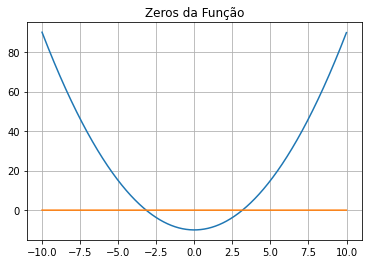


Método de Newton
zero 1:-3.1622776601683795
zero 2: 3.1622776601683795

Método das Secantes
zero 1: -3.1622776601683795
zero 2: 3.1622776601683795

-3.162277660108521
3.162277660236577


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
  return x**2 -10                      #substituir função

def der_analitica(x):
  return 2*x                           #resultado analitico

def der_dir(f, x, delx):
  return (f(x+delx)-f(x))/delx

def der_ctr(f, x, delx):
  fLinha = (f(x+delx)-f(x-delx))/(2*delx)
  return fLinha

def zeroNwtn(f, der_ctr, a, tol, delx): #parametro 'a' igual ponto de inicio para a função Zero Newton
  while abs(f(a)) > abs(tol):
    b = a - f(a)/der_ctr(f, a, delx)   #atençao para parâmetro 'delx' 
    a = b
  return a

def zeroSecante(eps, f, a, b, iteracoes):
    cont = 0
    while True:
        x = a - f(a)*(b-a)/(f(b)-f(a))
        if(abs(f(a)) < eps) or (abs(f(b - a)) < eps) and (cont <=iteracoes):
            break
        else:
            a = b
            b = x
        cont += 1
    return x

def zeroBissec(a, b, tol):
  if f(a)*f(b) < 0:
    while ((np.abs(b-a)/2) >= tol):
      x = (a+b)/2
      if f(a)*f(x) < 0:
        b = x
      else:
        a = x
 # else:
 #   print(f(a),f(b))
  return x

#grafico_zeros
array_x = np.arange(-10,10,0.01)       # valores para x

plt.title('Zeros da Função')
plt.plot(array_x,f(array_x))
plt.plot(array_x,0*array_x)
plt.grid()
plt.show()

#resultados
print(f'\nMétodo de Newton\nzero 1:{zeroNwtn(f, der_ctr, -5, 1e-10, 1000)}')
print(f'zero 2: {zeroNwtn(f, der_ctr, 1, 1e-10, 1000)}\n')

print(f'Método das Secantes\nzero 1: {zeroSecante(10**(-6), f, -10, 100, 100)}')
print(f'zero 2: {zeroSecante(10**(-6), f ,0, 10, 100)}\n')

print(zeroBissec(-5, 0.1, 1e-10))
print(zeroBissec(0.1, 5, 1e-10))

**Tarefa Zero de Funções**


Resultados:
θ1=0.32,
θ2=1.19
t1:2.53
t2:6.42



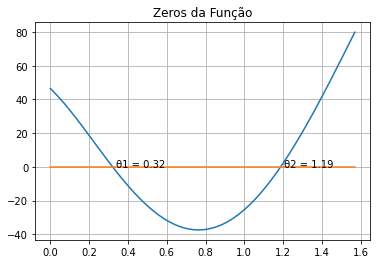

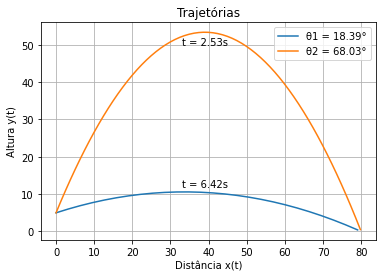

In [1]:
import numpy as np
import matplotlib.pyplot as plt
#condições iniciais
x1=80
y0=5
v0=120/3.6
g=9.88

#funcoes
def t(y0,funcao_theta,der_ctr,a,tol):
  t = (1/g)*(v0*np.sin(zeros_newton(funcao_theta,der_ctr,a,tol))+np.sqrt((v0**2)*(np.sin(zeros_newton(funcao_theta,der_ctr,a,tol))**2)+2*g*y0))
  return t
def x(theta,t):
  x_ = v0*np.cos(theta)*t
  return x_
def y(theta,t):
  y_ = y0+v0*np.sin(theta)*t-1/2*(g*t**2)
  return y_
def funcao_theta(theta):
  fTheta = x1-(v0*np.cos(theta))/g*(v0*np.sin(theta)+np.sqrt((v0**2)*(np.sin(theta)**2)+2*g*y0))
  return fTheta
def der_ctr(funcao_theta,x1,delx):
  fLinha = (funcao_theta(x1+delx)-funcao_theta(x1-delx))/(2*delx)
  return fLinha
def zeros_newton(funcao_theta,der_ctr,a,tol):
  while abs(funcao_theta(a)) > abs(tol):
    b = a - (funcao_theta(a)/der_ctr(funcao_theta,a,1e-8))
    a = b
  return a

#resultados
theta_1 = zeros_newton(funcao_theta,der_ctr,0,1e-10)
theta_2 = zeros_newton(funcao_theta,der_ctr,1,1e-10)
t_1 = t(y0,funcao_theta,der_ctr,0,1e-10)
t_2 = t(y0,funcao_theta,der_ctr,1,1e-10)
x_1 = x(theta_1,np.arange(0,t_1,0.1))
x_2 = x(theta_2,np.arange(0,t_2,0.1))
y_1 = y(theta_1,np.arange(0,t_1,0.1))
y_2 = y(theta_2,np.arange(0,t_2,0.1))
print(f'\nResultados:\nθ1={theta_1:.2f},\nθ2={theta_2:.2f}\nt1:{t_1:.2f}\nt2:{t_2:.2f}\n')

#grafico_zeros
plt.title('Zeros da Função')
array_x = np.arange(0,np.pi/2,0.01)
plt.plot(array_x,funcao_theta(array_x))
plt.plot(array_x,0*array_x)
plt.text(theta_1,0,f' θ1 = {theta_1:.2f}')
plt.text(theta_2,0,f' θ2 = {theta_2:.2f}')
plt.grid()
plt.show()

print('\n')

#grafico_trajetorias
plt.plot(x_1,y_1)
plt.plot(x_2,y_2)
plt.title('Trajetórias')
plt.legend([f'θ1 = {theta_1*(180/np.pi):.2f}°',f'θ2 = {theta_2*(180/np.pi):.2f}°'])
plt.xlabel('Distância x(t)')
plt.ylabel('Altura y(t)')
plt.text(33,50,f't = {t_1:.2f}s')
plt.text(33,12,f't = {t_2:.2f}s')
plt.grid()
plt.show()
